# Chapter 14: Deep Computer Vision Using Convolutional Neural Networks

**Tujuan:** Memahami arsitektur CNN (convolution, pooling), membangun CNN sederhana dengan Keras, dan transfer learning dengan model pretrained.

---

## 1. Motivasi: Visual Cortex & Convolutions

- **Visual cortex** di otak memproses gambar dengan lapisan neuron yang peka ke pola lokal (edge, tekstur).  
- **CNN** meniru mekanisme ini dengan _convolutional layers_ yang belajar filter lokal.  

### 1.1 Convolution Layer

- Gunakan kernel/filter (misal 3×3) yang dislid ke seluruh gambar  
- Setiap filter belajar mendeteksi pola (edge, corner, dsb)  
- Output = _feature maps_

### 1.2 Pooling Layer

- Turunkan resolusi (_spatial downsampling_) untuk invariansi lokal  
- **Max‐Pooling** (ambil maksimum di patch) paling umum

---

## 2. Contoh CNN Sederhana di Keras (CIFAR‑10)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

### 2.1 Load & preprocess data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

### 2.2 Bangun model CNN

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2.3 Compile

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### 2.4 Train

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3072 - loss: 1.8540 - val_accuracy: 0.4880 - val_loss: 1.4108
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5306 - loss: 1.3071 - val_accuracy: 0.5882 - val_loss: 1.1650
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5996 - loss: 1.1262 - val_accuracy: 0.6248 - val_loss: 1.0738
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6379 - loss: 1.0223 - val_accuracy: 0.6704 - val_loss: 0.9635
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6689 - loss: 0.9391 - val_accuracy: 0.6796 - val_loss: 0.9228
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7004 - loss: 0.8586 - val_accuracy: 0.6954 - val_loss: 0.8821
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7134 - loss: 0.8202 - val_accuracy: 0.6948 - val_loss: 0.8835
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7258 - loss: 0.7745 - val_accuracy: 0

### 2.5 Evaluate

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7054 - loss: 0.8680
Test accuracy: 0.698


### 2.6 Plot training curves

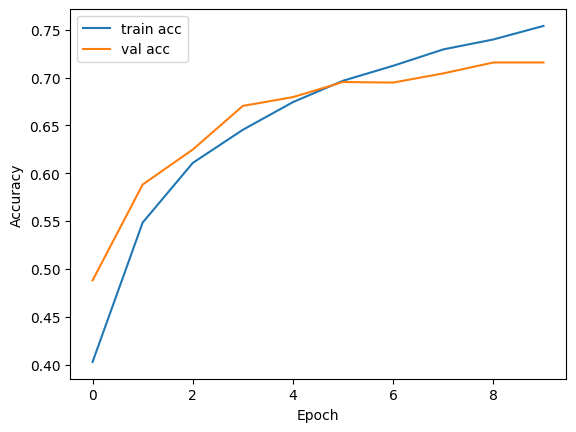

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.show()

## 3. Arsitektur CNN Populer
- LeNet‑5 (1998): 2× Conv+Pool + 3× Fully‑Connected (digit recognition)

- AlexNet (2012): 5× Conv + 3× Fully‑Connected, ReLU, Dropout (ImageNet breakthrough)

- VGGNet (2014): banyak layer kecil (3×3 Conv)

- ResNet (2015): _skip connections_ (residual blocks)

- Inception, Xception, MobileNet: arsitektur efisien & ringan

## 4. Transfer Learning dengan Pretrained Model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# 4.1 Load base model (tanpa head)
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(224,224,3))
base_model.trainable = False

# 4.2 Bangun classifier atas base
inputs = layers.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x)
tl_model = models.Model(inputs, outputs)

# 4.3 Compile & demo training singkat
tl_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Demo: resize CIFAR‑10 & subset
import tensorflow as tf
(x_c, y_c), _ = cifar10.load_data()
x_c = tf.image.resize(x_c, (224,224))[:5000]/255.0
y_c = y_c[:5000]

tl_model.fit(x_c, y_c, epochs=3, batch_size=32, validation_split=0.1)

# Ringkasan Chapter 14
1. Conv + Pooling meniru proses visual cortex.

2. CNN sederhana dapat dibangun di Keras (Conv2D → Pool → Dense).

3. Banyak arsitektur populer: LeNet, AlexNet, VGG, ResNet, dsb.

4. Transfer Learning mempercepat perolehan performa tinggi pada dataset kecil.